# Methods Supplementary Information 1

## 1. Survival Parameters

Derive mortality parameter from litertaure data and subsitite into survival equation

In [37]:
#Packages needed
library(ggplot2)
library(dplyr)
library(minpack.lm)
library(cowplot)

In [39]:
#Read in data
mortality_data<-read.csv("../Data/mortalitydata.csv")
head(mortality_data)

,IndividualID,OriginalID,FinalID,OriginalTraitName,OriginalTraitDef,StandardisedTraitName,StandardisedTraitDef,OriginalTraitValue,OriginalTraitUnit,OriginalErrorPos,⋯,PhysicalProcess_2,CitationID,Citation,DOI,Published,FigureTable,Notes,SubmittedBy,ContributorEmail,ManualCheck
,<lgl>,<int>,<lgl>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,⋯,<lgl>,<int>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<lgl>,<chr>,<lgl>
1,NA,22,NA,Mortality rate,mortality of brown trout embryos after hatching,NA,NA,0.3817428,NA,NA,⋯,NA,4,"Ojanguren, A. F., & Braña, F. (2003). Thermal dependence of embryonic growth and development in brown trout. Journal of Fish Biology, 62(3), 580–590.",https://doi.org/10.1046/j.1095-8649.2003.00049.x,TRUE,Figure 1a,NA,NA,olivia.morris15@imperial.ac.uk,NA
2,NA,22,NA,Mortality rate,mortality of brown trout embryos after hatching,NA,NA,0.3817428,NA,NA,⋯,NA,4,"Ojanguren, A. F., & Braña, F. (2003). Thermal dependence of embryonic growth and development in brown trout. Journal of Fish Biology, 62(3), 580–590.",https://doi.org/10.1046/j.1095-8649.2003.00049.x,TRUE,Figure 1a,NA,NA,olivia.morris15@imperial.ac.uk,NA
3,NA,22,NA,Mortality rate,mortality of brown trout embryos after hatching,NA,NA,0.3775934,NA,NA,⋯,NA,4,"Ojanguren, A. F., & Braña, F. (2003). Thermal dependence of embryonic growth and development in brown trout. Journal of Fish Biology, 62(3), 580–590.",https://doi.org/10.1046/j.1095-8649.2003.00049.x,TRUE,Figure 1a,NA,NA,olivia.morris15@imperial.ac.uk,NA
4,NA,22,NA,Mortality rate,mortality of brown trout embryos after hatching,NA,NA,0.3734440,NA,NA,⋯,NA,4,"Ojanguren, A. F., & Braña, F. (2003). Thermal dependence of embryonic growth and development in brown trout. Journal of Fish Biology, 62(3), 580–590.",https://doi.org/10.1046/j.1095-8649.2003.00049.x,TRUE,Figure 1a,NA,NA,olivia.morris15@imperial.ac.uk,NA
5,NA,22,NA,Mortality rate,mortality of brown trout embryos after hatching,NA,NA,0.3734440,NA,NA,⋯,NA,4,"Ojanguren, A. F., & Braña, F. (2003). Thermal dependence of embryonic growth and development in brown trout. Journal of Fish Biology, 62(3), 580–590.",https://doi.org/10.1046/j.1095-8649.2003.00049.x,TRUE,Figure 1a,NA,NA,olivia.morris15@imperial.ac.uk,NA
6,NA,22,NA,Mortality rate,mortality of brown trout embryos after hatching,NA,NA,0.3734440,NA,NA,⋯,NA,4,"Ojanguren, A. F., & Braña, F. (2003). Thermal dependence of embryonic growth and development in brown trout. Journal of Fish Biology, 62(3), 580–590.",https://doi.org/10.1046/j.1095-8649.2003.00049.x,TRUE,Figure 1a,NA,NA,olivia.morris15@imperial.ac.uk,NA


In [156]:
#Inverse sharpe-schoolfield function
Mort_Inv_sharpeschoo<- function(Tc, T_pk, E_D, X0){ #Tc: temp in cels, T_pk: thermal optimum(in this case minimum), E_D: deactivation energy, S0: inverse s-s constant
    #Convert input temps to kelvin
    Temp <- Tc+273.15
    T_pk_kel<-T_pk+273.15
    #Assign T_ref, E and k
    T_ref<- 0+273.15 #in kelvins
    E<- 0.45 #Activation energy
    k<- 8.62*(10^(-5)) #Boltzmann's constant
    #Eqn
    Inv_S_S<- (X0 )* (( ( ( ( - E * exp( (E_D*(Temp-T_pk_kel))/(Temp*T_pk_kel*k) )  + E - E_D)  )* exp( - (( E*(Temp-T_ref))/ (Temp * T_ref * k)) ) ) /  (  E-E_D )))  
  return(Inv_S_S)
}

Non-linear least squares fitting

In [157]:
schoofit<- nlsLM(OriginalTraitValue ~ Mort_Inv_sharpeschoo(ConTemp,T_pk, E_D, X0), data=mortality_data, start = list(T_pk=9, E_D=4, X0=0))

In [158]:
summary(schoofit)


Formula: OriginalTraitValue ~ Mort_Inv_sharpeschoo(ConTemp, T_pk, E_D, 
    X0)

Parameters:
     Estimate Std. Error t value Pr(>|t|)    
T_pk   9.0579     0.7988  11.340  < 2e-16 ***
E_D    2.1060     0.3034   6.941 3.22e-10 ***
X0     0.6131     0.0541  11.333  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1689 on 106 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 1.49e-08


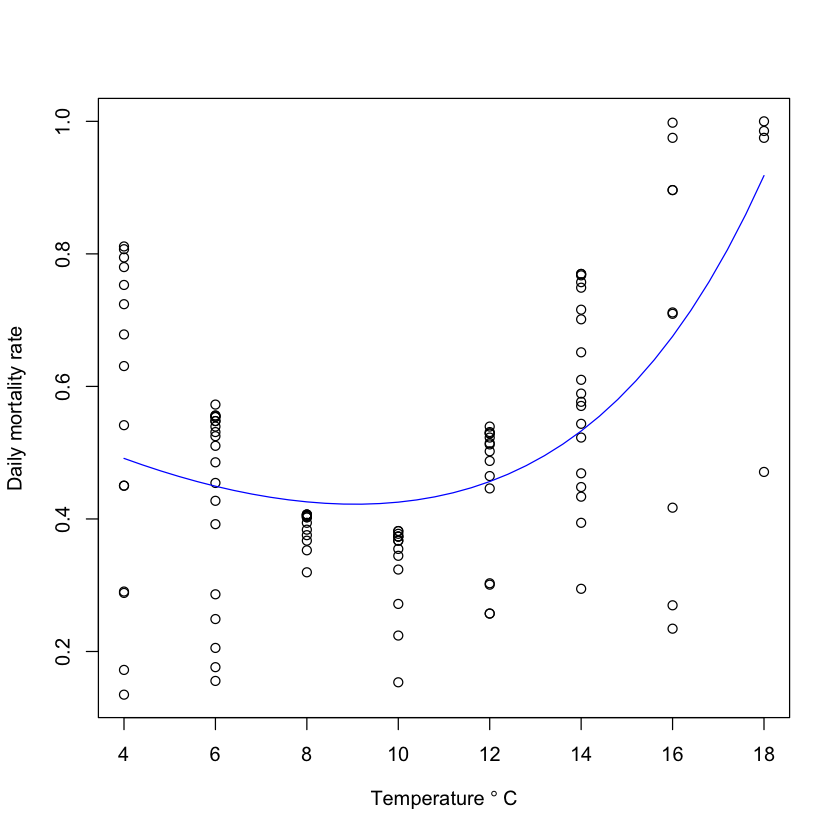

In [43]:
#Visualise the fit

#for this generate a vector of x axis variable for plotting
Lengths <- seq(min(mortality_data$ConTemp),max(mortality_data$ConTemp),len=36)
predic2plotschoo<- Mort_Inv_sharpeschoo(Lengths, coef(schoofit)["T_pk"], coef(schoofit)["E_D"], coef(schoofit)["X0"])

#Plot the data and the fitted model line:
plot(mortality_data$ConTemp, mortality_data$OriginalTraitValue, ylab="Daily mortality rate", xlab=expression(Temperature~degree~C))
lines(Lengths, predic2plotschoo, col = "blue")

In [44]:
#Mass correct X0 parameter - input X0 to get z0
getz0<- function(X0, m){
  X0*m^(0.25)
}

In [45]:
getz0(X0 = as.numeric(coef(schoofit)["X0"]), m = 0.04930978) #m from data mean length across all temps (Fig 4 in reference - at hatching)

[1] 0.2889341

Compared to Savage et al. (2004), this results in a value for mass- and tempertaure-independent $z_0$ being too high. We therefore compare the U-shaped relationship of survival to the Arrhenius relationship, and shift mortality to line up with this.

<div>
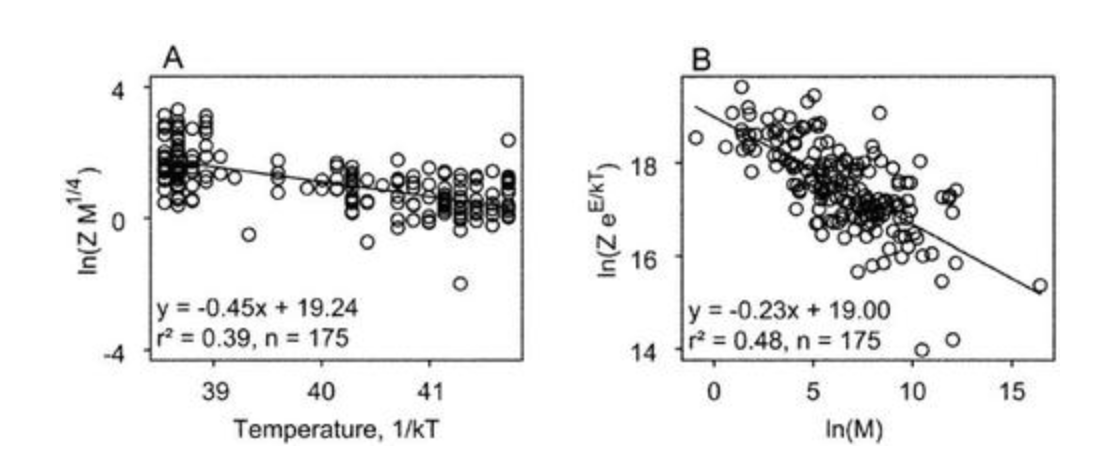
</div>

In [140]:
arrhenius<- function(m, Tc, z0 = 19.24, power = -0.25, E = 0.45){ #fix temp for now
  Temp = Tc+273.15    #convert Tc to kelvin
  k<- 8.62*(10^(-5)) #Boltzmann's constant
  Z <- exp(z0) * (m^ (power)) * exp(-(E/(k*Temp))) #mortality rate/year from savage
  dailyZ <- Z/365.25 #/day
  return(dailyZ)
}

In [177]:
temps<-0:30

Z_arrh<-arrhenius(m = 0.04930978, Tc = temps)
Z<-Mort_Inv_sharpeschoo(X0 = as.numeric(coef(schoofit)["X0"]), Tc= temps, T_pk = as.numeric(coef(schoofit)["T_pk"]), E_D = as.numeric(coef(schoofit)["E_D"]))
move<-Mort_Inv_sharpeschoo(X0 = 0.02, Tc= temps, T_pk = as.numeric(coef(schoofit)["T_pk"]), E_D = as.numeric(coef(schoofit)["E_D"]))


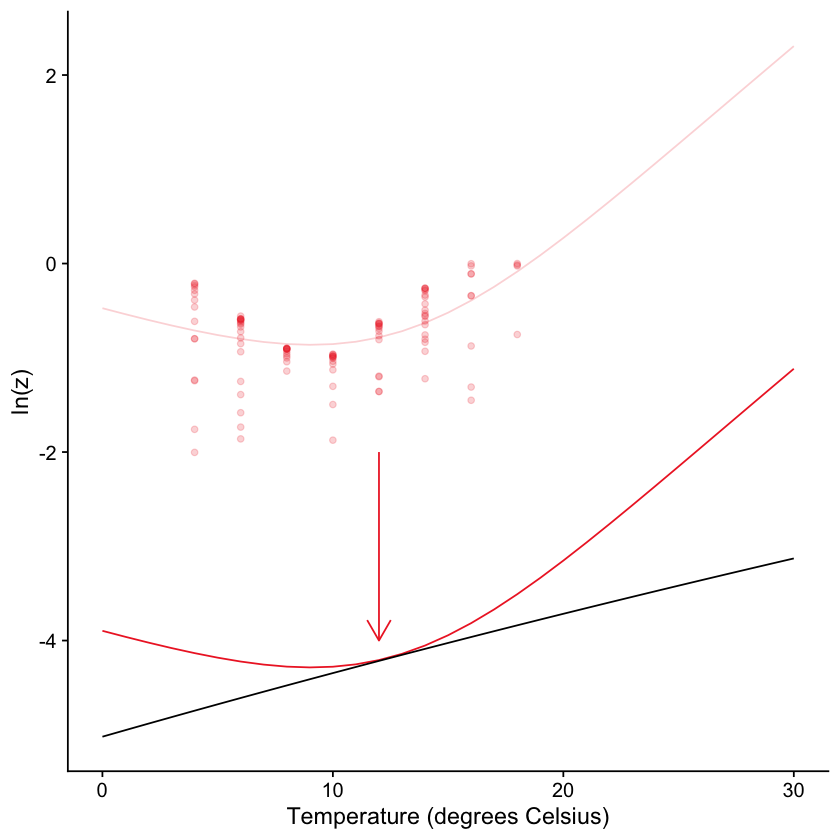

In [178]:
#plot
ggplot()+
  geom_line(aes(x = temps,y = log(move)), col = "firebrick2")+
  geom_line(aes(x = temps,y = log(Z)), col = "firebrick2", alpha = .2)+
  geom_line(aes(x = temps,y = log(Z_arrh)))+
  geom_point(data = mortality_data, aes(x = ConTemp,y = log(OriginalTraitValue)), col = "firebrick2", alpha = .2)+
  labs(x= "Temperature (degrees Celsius)", y = "ln(z)")+
 geom_segment(aes(x = 12, y = -2, xend = 12, yend = -4), arrow = arrow(length = unit(0.5, "cm")), col = "firebrick2")+
  theme_cowplot()


In [179]:
Metabolic_survival<-getz0(X0 = 0.02, m = 0.04930978)
Metabolic_survival

[1] 0.009424607

## 2. Growth Parameters

In [143]:
#read in digitised data
ogmtestdata<-read.csv("../Data/OGMdata.csv")

Subset the data where temperature was recorded
(all Atlantic salmon spp, lab data and under non-limiting resources)

In [144]:
#subset temperature data
tempdata<-ogmtestdata[!is.na(ogmtestdata$Temperature), ]

Plotting each life stage after the other to give one curve

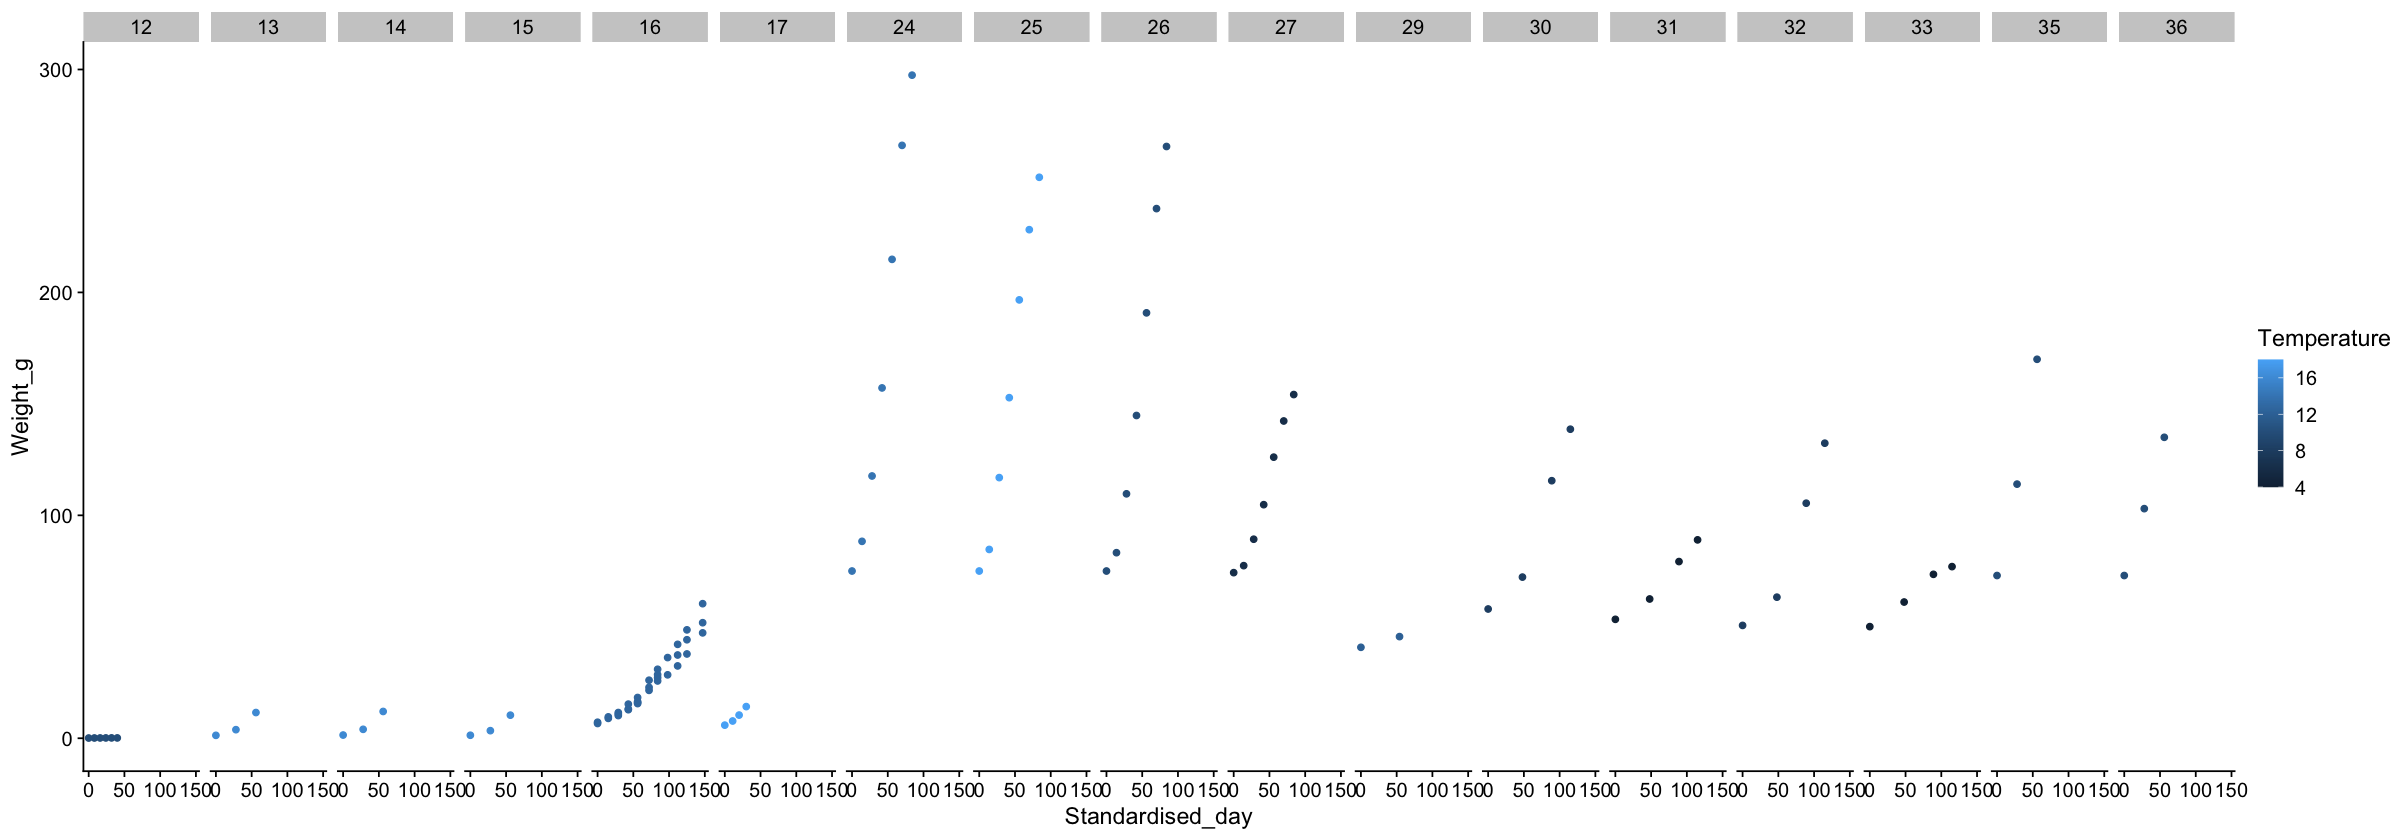

In [145]:
options(repr.plot.width=20, repr.plot.height=7) 
ggplot(tempdata, aes(Standardised_day, Weight_g, colour = Temperature))+
    geom_point()+
    facet_grid(~ID)+
    theme_cowplot()

Remove IDs with not enough measurements for model fitting

In [146]:
#remove IDs with less than 5 measurements
tempdata_subs<-tempdata %>% 
  group_by(ID) %>% 
  filter(n() >= 5)

In [147]:
unique(tempdata_subs$ID)

[1] 12 16 24 25 26 27

In [148]:
#Subset data
ID12 <-subset(tempdata, ID == 12)
ID16 <-subset(tempdata, ID == 16)
ID24 <-subset(tempdata, ID == 24)
ID25 <-subset(tempdata, ID == 25)
ID26 <-subset(tempdata, ID == 26)
ID27 <-subset(tempdata, ID == 27)

Growth Equation (10)

In [149]:
#Ontogentic Growth Model. Mass m reached over developmental time t
ogm <- function(t, a, t0, m0 = 0.03, mA = 20000){ #t: time in days from above function, Tc: temp degrees celsius, t0: normalisation constant, a: slope, alpha=-E/kT_0^2
  k <- 8.62*(10^(-5))
  m <- mA * ( 1- (1-((m0/mA)^0.25)) * (exp(-a*(t+t0)/(4*(mA^0.25))) )) ^4
  return(m) #mass reached after amount of time t
}

NLLS function to fit ogm function to each data set (growth curve)

In [150]:
ogm_nls_12<- nlsLM(Weight_g ~ ogm(t = Standardised_day, a, t0),
                data=ID12, start=list(a = 0.01, t0 = 0) )

ogm_nls_16<- nlsLM(Weight_g ~ ogm(t = Standardised_day, a, t0),
                data=ID16, start=list(a = 0.01, t0 = 0) )

ogm_nls_24<- nlsLM(Weight_g ~ ogm(t = Standardised_day, a, t0),
                data=ID24, start=list(a = 0.01, t0 = 0) )

ogm_nls_25<- nlsLM(Weight_g ~ ogm(t = Standardised_day, a, t0),
                data=ID25, start=list(a = 0.01, t0 = 0) )
           
ogm_nls_26<- nlsLM(Weight_g ~ ogm(t = Standardised_day, a, t0),
                data=ID26, start=list(a = 0.01, t0 = 0) )

ogm_nls_27<- nlsLM(Weight_g ~ ogm(t = Standardised_day, a, t0),
                data=ID27, start=list(a = 0.01, t0 = 0) )

Visualise fit

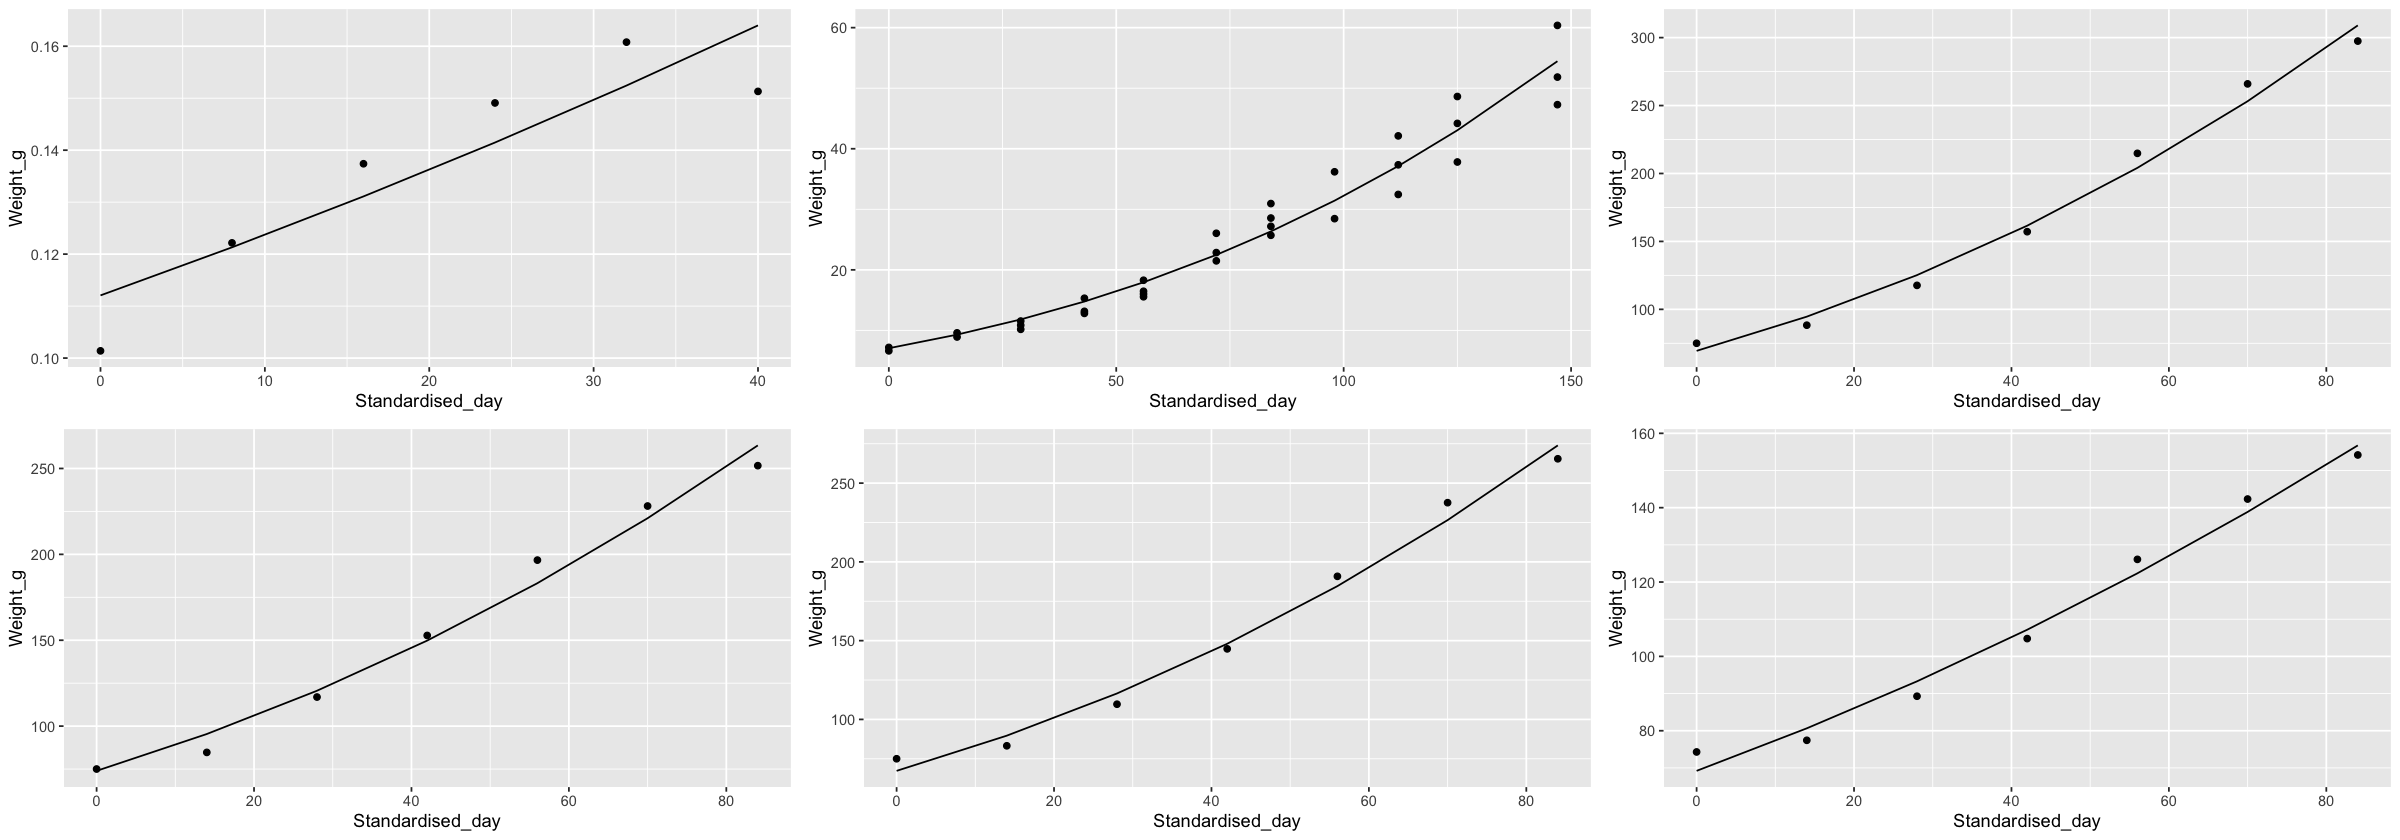

In [151]:
p12<-ggplot(aes(Standardised_day, Weight_g), data = ID12)+
         geom_point()+
         geom_line(aes( y=predict(ogm_nls_12)))
p16<-ggplot(aes(Standardised_day, Weight_g), data = ID16)+
         geom_point()+
         geom_line(aes( y=predict(ogm_nls_16)))
p24<-ggplot(aes(Standardised_day, Weight_g), data = ID24)+
         geom_point()+
         geom_line(aes( y=predict(ogm_nls_24)))        
p25<-ggplot(aes(Standardised_day, Weight_g), data = ID25)+
         geom_point()+
         geom_line(aes( y=predict(ogm_nls_25)))  
p26<-ggplot(aes(Standardised_day, Weight_g), data = ID26)+
         geom_point()+
         geom_line(aes( y=predict(ogm_nls_26)))
p27<-ggplot(aes(Standardised_day, Weight_g), data = ID27)+
         geom_point()+
         geom_line(aes( y=predict(ogm_nls_27)))

plot_grid(p12, p16, p24, p25, p26, p27)

Create dataframe to calculate value 

In [153]:
#Boltzmann's constant
k<- 8.62*(10^(-5)) 
#parameter a from fits to data
a<-c(coef(ogm_nls_12)[1], coef(ogm_nls_16)[1], coef(ogm_nls_24)[1], coef(ogm_nls_25)[1], coef(ogm_nls_26)[1], coef(ogm_nls_27)[1])
#Time elapsed
t0<-c(coef(ogm_nls_12)[2], coef(ogm_nls_16)[2], coef(ogm_nls_24)[2], coef(ogm_nls_25)[2], coef(ogm_nls_26)[2], coef(ogm_nls_27)[2])
#Temperature
temps<-c(unique(ID12$Temperature), unique(ID16$Temperature), unique(ID24$Temperature), unique(ID25$Temperature), unique(ID26$Temperature), unique(ID27$Temperature))
at0stemps<-as.data.frame(cbind(a, t0, temps))
#Inverse temperature
at0stemps$inversetemp<- (1/( k * (at0stemps$temps +273))) - (1/( k * (273)))
at0stemps

,a,t0,temps,inversetemp
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00609107,111.3043,10.0,-1.5015633
a.1,0.03622293,146.7725,12.6,-1.8747460
a.2,0.08871736,129.9891,14.0,-2.0728899
a.3,0.07390568,159.3166,18.0,-2.6285098
a.4,0.08103775,140.8672,10.0,-1.5015633
a.5,0.04268879,269.8395,6.0,-0.9138547


Plotting this relationship to fit linear model and derive intercept


Call:
lm(formula = log(at0stemps$a) ~ at0stemps$inversetemp)

Coefficients:
          (Intercept)  at0stemps$inversetemp  
              -4.2283                -0.5963  


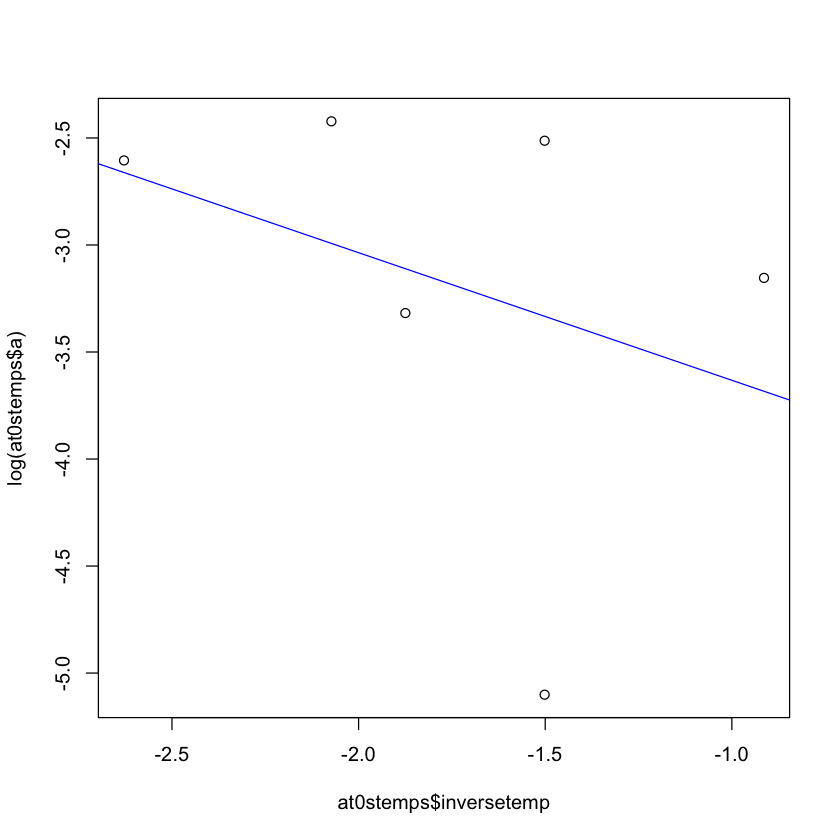

In [154]:
options(repr.plot.width=7, repr.plot.height=7)
plot(log(at0stemps$a)~ at0stemps$inversetemp)
abline(lm(log(at0stemps$a)~ at0stemps$inversetemp), col = "blue")
lm(log(at0stemps$a)~ at0stemps$inversetemp)

In [155]:
aint_mod<-lm(log(at0stemps$a)~ at0stemps$inversetemp)
Metabolic_Growth<-exp(coef(aint_mod)[1]) #exp(coef(aint_mod)[1]) / exp(-coef(aint_mod)[2] / (k * 273))
Metabolic_Growth

(Intercept) 
 0.01457677